# cette parties les questions seront entre autres au choix 

Programmation dynamique (DP) 
- Fibonacci
- sacs à dos (knapsack)
- LCS
- tableau de DP
- sous-structures optimales

## suite de Fibonacci 

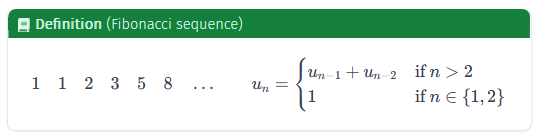

- T(n) = T(n-1) + T(n-2) =< 2 T(n-1) =< 2² T(n-2)

In [19]:
def fibonacci(n: int) -> int:
    if n <= 2:
        return 1
    return fibonacci(n - 1) + fibonacci(n - 2)

[fibonacci(n) for n in range(1, 30)]

[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229]

# fiboncci : caching

How could we speed up the fuction 

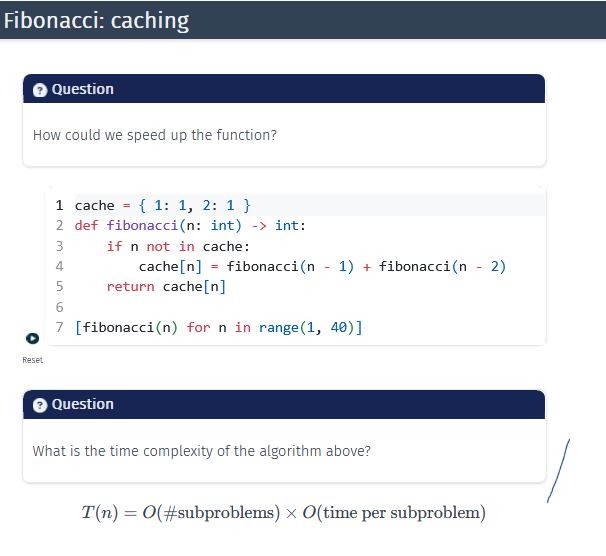

On utilise le catch pour eviter de recalculer afin d'avoir moins de temps .

- on peut utiliser facilement imports caths



# Exemple :
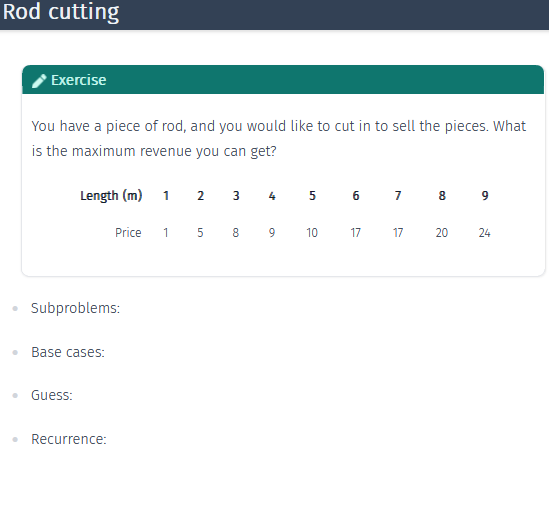

- Subproblems: P(n) = maximum revenue for a rod of length n

- Base cases : P(0) = 0 et P(1) = 1

- Guess : First cut eg : 3 m ----> 8 € 
                         m  -----> P(20 - m)


- Recurrence :  P(n) = {

    0 if n = 0
    1 if n = 1
    maxim{ f(m) + P(20 - m)}
}

In [20]:
import functools
p = [0, 1, 5, 8, 9, 10, 17, 17, 20, 24 ]



@functools.cache
def cut_rod(n: int):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return max([p[i] + cut_rod(n-1)
                for i in range(1, n + 1)
                
    #return max(p[i] + cut_rod(n - i - 1) for i in range(n))
    ])

cut_rod(5)


# complexité: O(n^2)
# Number of subproblems: O(n)
# Time to solve each subproblem: O(n)
# complexité totale = O(n) * O(n) = O(n^2) = number of subproblems * time to solve each subproblem


33

In [21]:
# Longest common subsequence
#LCS(A, B) = "HYPERLINKING" , "DOLPHINSPEAK"

# subproblems:LCS(A, B) where A et A are substrings of the original strings
# base cases:
#LCS("", B) = ""
#LCS(A, "") = ""
# GUESSE FORLCS(A, B): soit les permier caractères de A et B sont égaux, on enleve ces caractères et on ajoute ce caractère à la solution deLCS(A[1:], B[1:]) un 1
# sinon, on calculeLCS(A[1:], B) etLCS(A, B[1:]) et on prend la plus longue des deux solutions

# recursive formulation:
import functools


@functools.cache
def LCS(A: str, B: str):
    if A == "" or A == "":
        return 0
    if A[0] == B[0]:
        return 1 + LCS(A[1:], B[1:])
    # pourquoi mon rerturn ne fonctionne pas?
    # key=len
    return 0
    #return max(LCS(A, B[1:]), LCS(A[1:], B), key=len)



LCS("HYPERLINKING", "DOLPHINSPEAK")
    



 

0

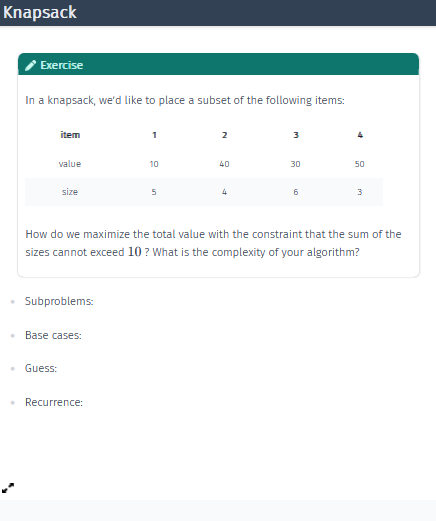


- subproblems: KS(i, C) C : max capacity only {1, 2, ,, 4}

In [27]:


v = [10, 40, 30, 50]
s = [5, 4, 6, 3]

import functools
@functools.cache
def KS(i: int, C: int):
    """
    Returns the total value that is possible
    for a knapsack of capacity C
    and only by using items 1, 2, ..., i
    """
    if i == 0 or C == 0:
        return 0
    
    # si i est trop lourd
    if s[i] > C:
        return KS(i - 1, C)
    
    # sinon, on teste les deux autres
    return max(
        # take i 
        v[i] + KS(i - 1, C - s[i]),
        # don't take i 
        KS(i - 1, C)
    )

KS(3,4)

    # # ici c'est d'abord la valeur C soit je prends ou je laisse ? 
    # if C <= 10 :
    #     return max(KS(i-1, C-s[i-1]), v[i-1])

    # return max(KS(i-1, C), v[i-1])







50

In [42]:


v = [10, 40, 30, 50]
s = [5, 4, 6, 3]

import functools
@functools.cache
def KS(i: int, C: int):

    if i == 0 or C == 0:
        return []
    # si i est trop lourd
    if s[i] > C:
        return KS(i - 1, C)
    # sinon, on teste les deux autres
    return max(
        # take i 
        [i] + KS(i - 1, C - s[i]),
        # don't take i 
        KS(i - 1, C),
        key=lambda chioce: sum([v[i] for i in chioce])
    )

KS(3,3)


[3]

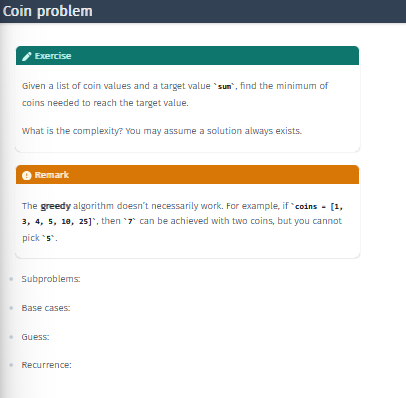

- subproblems: min_coins(), MC (amount) # minimal de pièces pour atteindre 'amount'

- Base cases: MC(0) = 0

- Guess: quelle est la prémiere pièce ? 


- Reccurence:    
     - MC(A) = min{
        - 0 si A = 0
        - 1 + MC(A - P)
    }

    - on prends le minimum 

In [40]:
coins = [1, 3, 4, 5, 10, 25]

import functools
@functools.cache
def min_coins(value: int):
    if value == 0:
        return 0
    
    return min(
        1 + min_coins(value - coin)
        for coin in coins
        if value - coin >= 0
    )   

    

min_coins(65)

4

In [48]:
coins = [1, 3, 4, 5, 10, 25]

import functools
@functools.cache
def min_coins(value: int):
    if value == 0:
        return []
    
    return min([
        1 + min_coins(value - coin)
        for coin in coins
        if value - coin >= 0
    ], key=len)


# si je veux un sortie en liste des pièces utilisées je'ajoute juste cela non  ? key=lambda choice: sum([v[i] for i in choice])

min_coins(65)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

# idée
on résout un problème glibal en résolvant des sous-problèmes simplement, en les stockant dans un tableau.

### 3 critères pour la programmation dynamique (DP)
- sous problèmes qui se répètent
- surstructure optimale
- tableau de mémoire (bottom-up ou top-down)

### exemples obligatiores à connaitre (examen oral)

- Fibonacci (DP vs récursion simple)
- LCS (longest common subsequence)
- Knapsack 
- disatance d'édition 

## table DP pour LCS :

|   | Ø | A | B | C |
| - | - | - | - | - |
| Ø | 0 | 0 | 0 | 0 |
| A | 0 | 1 | 1 | 1 |
| B | 0 | 1 | 2 | 2 |
| D | 0 | 1 | 2 | 2 |


- le but de DP c'est d'eviter la redondance des calculs car si on a plein des calculs à faire cela sera much

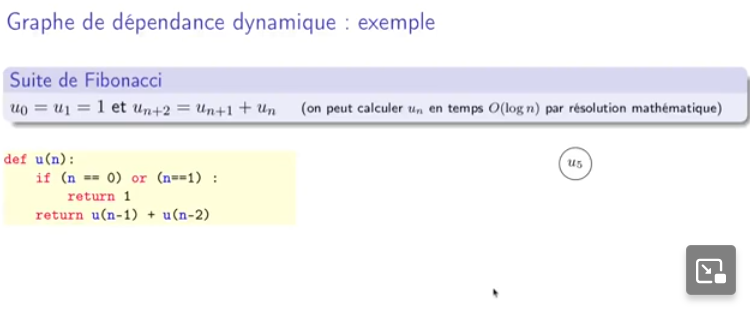

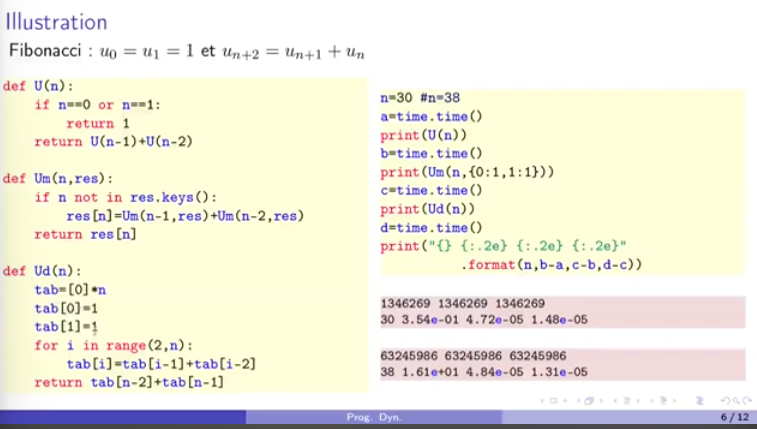

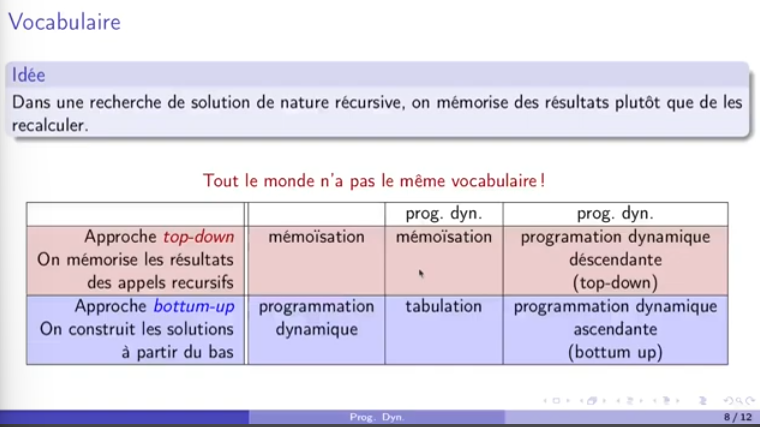